**Dictionary to store student information**

In [5]:
# 1. Create dictionary
student = {
    "name": "Ali",
    "age": 21,
    "roll_number": "159",
    "grade": "B"
}

# 2. Print all keys and values
print("Student info:")
for key, value in student.items():
    print(f"{key}: {value}")

# 3. Update the grade
student["grade"] = "A"
print("\nAfter updating grade:")
for key, value in student.items():
    print(f"{key}: {value}")

# 4. Add new key 'email'
student["email"] = "aliraza2k5@outlook.com"
print("\nAfter adding email:")
for key, value in student.items():
    print(f"{key}: {value}")

# 5. Delete roll_number
del student["roll_number"]
print("\nAfter deleting roll_number:")
for key, value in student.items():
    print(f"{key}: {value}")


Student info:
name: Ali
age: 21
roll_number: 159
grade: B

After updating grade:
name: Ali
age: 21
roll_number: 159
grade: A

After adding email:
name: Ali
age: 21
roll_number: 159
grade: A
email: aliraza2k5@outlook.com

After deleting roll_number:
name: Ali
age: 21
grade: A
email: aliraza2k5@outlook.com


**# Use of matplotlib library**

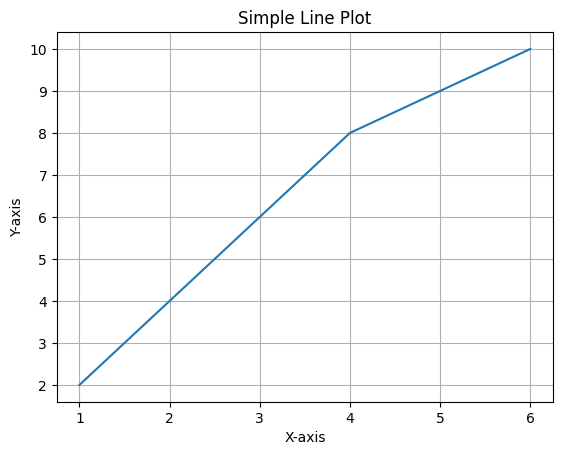

In [7]:
import matplotlib.pyplot as plt

# Data
X = [1, 2, 3, 4, 6]
Y = [2, 4, 6, 8, 10]

# Create a line plot
plt.plot(X, Y)
plt.title("Simple Line Plot")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.grid(True)
plt.show()


**# For Water jug Problem**

In [3]:
import time
import tracemalloc
from collections import deque

# Jug capacities and goal
jug1_capacity = 4
jug2_capacity = 3
goal = 2

def get_next_states(state):
    jug1, jug2 = state
    next_states = set()
    next_states.add((jug1_capacity, jug2))
    next_states.add((jug1, jug2_capacity))
    next_states.add((0, jug2))
    next_states.add((jug1, 0))
    # pour jug1 to jug2
    pour1to2 = min(jug1, jug2_capacity-jug2)
    next_states.add((jug1-pour1to2, jug2+pour1to2))
    # pour jug2 to jug1
    pour2to1 = min(jug2, jug1_capacity-jug1)
    next_states.add((jug1+pour2to1, jug2-pour2to1))
    return next_states

def bfs(start, goal):
    visited = set()
    queue = deque([(start, [])])
    while queue:
        state, path = queue.popleft()
        if state[0] == goal or state[1] == goal:
            return path + [state]
        visited.add(state)
        for next_state in get_next_states(state):
            if next_state not in visited:
                queue.append((next_state, path + [state]))
    return None

def dfs(start, goal):
    visited = set()
    stack = [(start, [])]
    while stack:
        state, path = stack.pop()
        if state[0] == goal or state[1] == goal:
            return path + [state]
        visited.add(state)
        for next_state in get_next_states(state):
            if next_state not in visited:
                stack.append((next_state, path + [state]))
    return None

# BFS
tracemalloc.start()
start_time = time.time()
bfs_path = bfs((0, 0), goal)
bfs_time = time.time() - start_time
bfs_memory = tracemalloc.get_traced_memory()[1]
bfs_steps = len(bfs_path) if bfs_path else 0
tracemalloc.stop()

# DFS
tracemalloc.start()
start_time = time.time()
dfs_path = dfs((0, 0), goal)
dfs_time = time.time() - start_time
dfs_memory = tracemalloc.get_traced_memory()[1]
dfs_steps = len(dfs_path) if dfs_path else 0
tracemalloc.stop()

print("BFS steps:", bfs_steps, "| Time:", bfs_time, "sec | Memory:", bfs_memory, "bytes")
print("DFS steps:", dfs_steps, "| Time:", dfs_time, "sec | Memory:", dfs_memory, "bytes")


BFS steps: 5 | Time: 0.0008571147918701172 sec | Memory: 19659 bytes
DFS steps: 9 | Time: 0.0004069805145263672 sec | Memory: 19563 bytes


# **A(*) to find the resulting path**

In [4]:
import heapq

# Maze (given as walks = 0, walls = 1)
maze = [
    [0, 1, 0, 0, 0, 0],
    [0, 0, 0, 1, 0, 1],
    [0, 0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0, 0],
    [0, 0, 0, 1, 0, 0],
    [1, 1, 0, 1, 0, 0]
]
start = (0, 0)
goal = (5, 5)
rows, cols = len(maze), len(maze[0])

def heuristic(a, b):
    # Manhattan distance
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

def neighbors(node):
    x, y = node
    for dx, dy in [(-1,0),(1,0),(0,-1),(0,1)]:
        nx, ny = x + dx, y + dy
        if 0 <= nx < rows and 0 <= ny < cols and maze[nx][ny] == 0:
            yield (nx, ny)

def a_star(start, goal):
    open_set = []
    heapq.heappush(open_set, (0 + heuristic(start, goal), 0, start, [start]))
    visited = set()
    while open_set:
        _, cost, node, path = heapq.heappop(open_set)
        if node == goal:
            return path
        if node in visited:
            continue
        visited.add(node)
        for neighbor in neighbors(node):
            if neighbor not in visited:
                heapq.heappush(open_set, (cost+1 + heuristic(neighbor, goal), cost+1, neighbor, path + [neighbor]))
    return None

result_path = a_star(start, goal)
if result_path:
    print("A* Path from A to Y:")
    for step in result_path:
        print(step)
else:
    print("No path found!")


A* Path from A to Y:
(0, 0)
(1, 0)
(1, 1)
(1, 2)
(0, 2)
(0, 3)
(0, 4)
(1, 4)
(2, 4)
(2, 5)
(3, 5)
(4, 5)
(5, 5)
